# Playstore EDA

## Table of Contents

1. [Problem Statement](#problem_statement)<br>
2. [Data Loading and Description](#data_loading)
3. [Data Profiling](#data_profiling)
    - 3.1 [Understanding the Dataset](#understanding)<br/>
    - 3.2 [Pre Profiling](#pre_profiling)<br/>
    - 3.3 [Preprocessing](#preprocessing)<br/>
    - 3.4 [Post Profiling](#postprocessing)<br/>
4. [Questions](#questions)
    - 4.1 [What are the top categories by median download count?](#section401)<br/>
    - 4.2 [Is low OS support any deciding factor for download count?](#section402)<br/>
    - 4.3 [Do paid apps have comparable download count with free apps?](#section403)<br/>
    - 4.4 [Is app size influencing download count?](#section404)<br/>
    - 4.5 [How content rating affects download count?](#section405)<br/>
    - 4.6 [How size is distributed among top 7 categories?](#section406)<br/>
    - 4.7 [How Content Rating is distributed among top 7 categories?](#section407)<br/>
    - 4.8 [Do apps with high review count have high download count?](#section408)<br/>
    - 4.9 [Do recently downloaded apps have high download count?](#section409)<br/>
    - 4.10 [Does download count increase with app maturity?](#section410)<br/>
5. [Conclusions](#conclusions)<br/>  

<a id='problem_statement'></a>
### 1. Problem Statement

This notebook explores the factors that help to get record number of install count for Android applications in Playstore. The data will be cleaned and exploratory data analysis will be done using Seaborn on the data.

<a id='data_loading'></a>
### 2. Data Loading and Description

- The dataset is taken from Kaggle where the author obtained the dat using web scrapping. The dataset contains 10841 records, each record corresponding to one Android application. 
- Because of the alogorithm mobile applications are recommended on Play store, the dataset is heavily influenced by a lot factors which include author's location, her interests.
- Below table shows names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| App           | Name of the Android application                           | 
| Category      | Category of application                                   |  
| Rating        | User rating                                               | 
| Reviews       | User reviews count                                        |   
| Installs      | Approximate installs count                                |
| Type          | Free or Paid                                              |
| Price         | Price of the application                                  |
| Content Rating| Content Rating of app as defined in play store            |
| Genres        | Genres of the application                                 |
| Last Updated  | Last Updated Date                                         |
| Current Ver   | Current version of the app                                |
| Android Ver   | Minimum Android OS support                                |

#### Importing packages                                          

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

#### Importing the Dataset

In [2]:
playstore_data = pd.read_csv("googleplaystore.csv")
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<a id='data_profiling'></a>
## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id='understanding'></a>
### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [3]:
playstore_data.shape

(10841, 13)

titanic_data has __10841 rows__ and __13 columns.__

In [4]:
playstore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
playstore_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
playstore_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
playstore_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

From above, we can see that Rating has most number of null values.

<a id='pre_profiling'></a>
### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [10]:
profile = pandas_profiling.ProfileReport(playstore_data)
profile.to_file(outputfile="playstore_before_preprocessing.html")

We have generated a preprocessing report for the dataset, using Pandas profiling. Now we will process our data to better understand it.

<a id='preprocessing'></a>
### 3.3 Preprocessing

- According to preprocessing report there are a lot of duplicates. First we will drop the duplicates

In [11]:
playstore_data.drop_duplicates(subset=None, keep='first', inplace=True)

In [12]:
playstore_data.shape

(10358, 13)

- There are apps with duplicate names. Let's check if they are same.

In [13]:
pd.concat(g for _, g in playstore_data.groupby("App") if len(g) > 1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3083,365Scores - Live Scores,SPORTS,4.6,666521,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
559,95Live -SG#1 Live Streaming App,DATING,4.1,4953,15M,"1,000,000+",Free,0,Teen,Dating,"August 1, 2018",8.7.2,4.2 and up


These apps seem to be duplicates of one another. So we can safely remove them.

In [14]:
playstore_data.drop_duplicates(subset="App", keep='first', inplace=True)

In [15]:
playstore_data.shape

(9660, 13)

- For one app, Type is missing. Let us find out the type from Play store and fix the data.

In [16]:
playstore_data[playstore_data['Type'].isnull()] # Fix Type = NaN

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [17]:
playstore_data["Type"].fillna("Free", inplace = True)

In [18]:
playstore_data[playstore_data['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


- For one app, Content Rating is missing. Let us find the content rating from Play store and fix the data.

In [19]:
# Fix Content rating = NaN
playstore_data[playstore_data['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [20]:
playstore_data['Content Rating'].unique() # Print unique values of Content Rating

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [21]:
playstore_data["Content Rating"].fillna("Everyone", inplace = True) # Replace NaN with Everyone

In [22]:
playstore_data[playstore_data['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


- For a few apps, Current Ver is missing. Let us find it out from Play store and fix it. Let us mark the 'Current Ver' as 1 for apps which don't have Current Ver visible on Play store.

In [23]:
playstore_data[playstore_data['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [24]:
playstore_data.loc[playstore_data.App == 'Learn To Draw Kawaii Characters', 'Current Ver'] = '1.001'

In [25]:
playstore_data.loc[playstore_data.App == 'Virtual DJ Sound Mixer', 'Current Ver'] = '4'

In [26]:
playstore_data.loc[playstore_data.App == 'Market Update Helper', 'Current Ver'] = '1'

In [27]:
playstore_data.loc[playstore_data.App == 'BT Master', 'Current Ver'] = '1'

In [28]:
playstore_data.loc[playstore_data.App == 'Dots puzzle', 'Current Ver'] = '1'

In [29]:
playstore_data.loc[playstore_data.App == 'Calculate My IQ', 'Current Ver'] = '1'

In [30]:
playstore_data.loc[playstore_data.App == 'UFO-CQ', 'Current Ver'] = '1'

In [31]:
playstore_data.loc[playstore_data.App == 'La Fe de Jesus', 'Current Ver'] = '1'

In [32]:
playstore_data[playstore_data['Current Ver'].isnull()] # Cleaned Current Ver

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


- Data is one app is misaligned. Let us align the data of that app correctly.

In [33]:
playstore_data[pd.to_numeric(playstore_data.Reviews, errors='coerce').isnull()] # Find rows with Reviews as string

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,NaN


In [34]:
playstore_data.loc[playstore_data.App == 'Life Made WI-Fi Touchscreen Photo Frame', 'Android Ver'] = '4.0 and up' # Clean this record

In [35]:
playstore_data.loc[playstore_data.App == 'Life Made WI-Fi Touchscreen Photo Frame', 'Current Ver'] = '1.0.19'

In [36]:
playstore_data.loc[playstore_data.App == 'Life Made WI-Fi Touchscreen Photo Frame', 'Last Updated'] = 'February 11, 2018'

In [37]:
playstore_data.loc[playstore_data.App == 'Life Made WI-Fi Touchscreen Photo Frame', 'Genres'] = 'Lifestyle'

In [38]:
playstore_data.loc[playstore_data.App == 'Life Made WI-Fi Touchscreen Photo Frame', 'Price'] = '0'

In [39]:
playstore_data.loc[playstore_data.App == 'Life Made WI-Fi Touchscreen Photo Frame', 'Type'] = 'Free'

In [40]:
playstore_data.loc[playstore_data.App == 'Life Made WI-Fi Touchscreen Photo Frame', 'Installs'] = '1,000+'

In [41]:
playstore_data.loc[playstore_data.App == 'Life Made WI-Fi Touchscreen Photo Frame', 'Size'] = '3.0M'

In [42]:
playstore_data.loc[playstore_data.App == 'Life Made WI-Fi Touchscreen Photo Frame', 'Rating'] = 1.9

In [43]:
playstore_data.loc[playstore_data.App == 'Life Made WI-Fi Touchscreen Photo Frame', 'Category'] = 'LIFESTYLE'

In [44]:
playstore_data.loc[playstore_data.App == 'Life Made WI-Fi Touchscreen Photo Frame', 'Reviews'] = '24'

In [45]:
playstore_data[pd.to_numeric(playstore_data.Reviews, errors='coerce').isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [46]:
playstore_data['Reviews Count'] = pd.to_numeric(playstore_data.Reviews, errors='coerce')

In [47]:
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Count
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,159
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,967
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,87510
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,215644
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,967


- Rating is missing for a lot of apps. Let us replace Nan rating with median rating of respective app's category.

In [48]:
playstore_data[playstore_data['Rating'].isnull()].shape

(1463, 14)

In [49]:
playstore_data[playstore_data['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Count
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up,61
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up,182
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up,119
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up,654
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up,77
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,"10,000+",Free,0,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up,35
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,"10,000+",Free,0,Mature 17+,Beauty,"January 24, 2018",3.0,3.0 and up,30
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7M,"10,000+",Free,0,Everyone,Books & Reference,"July 13, 2018",1.0,2.3 and up,161
180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2,7.2M,"50,000+",Free,0,Everyone,Books & Reference,"June 15, 2018",3.0,6.0 and up,2
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114,7.3M,"100,000+",Free,0,Everyone,Books & Reference,"August 7, 2015",1.1,5.1 and up,114


In [50]:
category = playstore_data[playstore_data['Rating'].isnull()].iloc[0, 1]
category

'ART_AND_DESIGN'

In [51]:
playstore_data[playstore_data.Category == category]['Rating'].median()

4.4

In [52]:
def fixRatings():
    for index, row in playstore_data.iterrows():
        if (pd.isnull(row['Rating'])):
            category = row['Category']
            medianRating = playstore_data[playstore_data.Category == category]['Rating'].median()
            print(index, category, medianRating)
            playstore_data.at[index,'Rating'] = medianRating
            
fixRatings()

23 ART_AND_DESIGN 4.4
113 BEAUTY 4.3
123 BEAUTY 4.3
126 BEAUTY 4.3
129 BEAUTY 4.3
130 BEAUTY 4.3
134 BEAUTY 4.3
163 BOOKS_AND_REFERENCE 4.5
180 BOOKS_AND_REFERENCE 4.5
185 BOOKS_AND_REFERENCE 4.5
227 BUSINESS 4.2
321 COMICS 4.4
478 DATING 4.1
479 DATING 4.1
480 DATING 4.1
610 DATING 4.1
613 DATING 4.1
617 DATING 4.1
620 DATING 4.1
621 DATING 4.1
623 DATING 4.1
624 DATING 4.1
626 DATING 4.1
627 DATING 4.1
628 DATING 4.1
629 DATING 4.1
630 DATING 4.1
631 DATING 4.1
632 DATING 4.1
635 DATING 4.1
637 DATING 4.1
638 DATING 4.1
639 DATING 4.1
641 DATING 4.1
642 DATING 4.1
643 DATING 4.1
644 DATING 4.1
647 DATING 4.1
648 DATING 4.1
649 DATING 4.1
650 DATING 4.1
651 DATING 4.1
652 DATING 4.1
653 DATING 4.1
658 DATING 4.1
659 DATING 4.1
660 DATING 4.1
669 DATING 4.1
698 DATING 4.1
704 EDUCATION 4.4
1013 EVENTS 4.5
1024 EVENTS 4.5
1025 EVENTS 4.5
1032 EVENTS 4.5
1033 EVENTS 4.5
1034 EVENTS 4.5
1039 EVENTS 4.5
1041 EVENTS 4.5
1043 EVENTS 4.5
1045 EVENTS 4.5
1046 EVENTS 4.5
1177 FOOD_AND_DRINK 4.3

6367 TOOLS 4.2
6377 PRODUCTIVITY 4.3
6389 BUSINESS 4.2
6393 FINANCE 4.3
6394 EVENTS 4.5
6399 COMMUNICATION 4.2
6425 PHOTOGRAPHY 4.3
6428 TOOLS 4.2
6430 BUSINESS 4.2
6433 PHOTOGRAPHY 4.3
6434 WEATHER 4.3
6435 MEDICAL 4.3
6436 FINANCE 4.3
6437 HEALTH_AND_FITNESS 4.5
6443 COMMUNICATION 4.2
6444 GAME 4.3
6445 FINANCE 4.3
6456 FAMILY 4.3
6460 SOCIAL 4.3
6464 BOOKS_AND_REFERENCE 4.5
6469 TOOLS 4.2
6470 SOCIAL 4.3
6473 SHOPPING 4.3
6475 MEDICAL 4.3
6478 SHOPPING 4.3
6479 FOOD_AND_DRINK 4.3
6480 FINANCE 4.3
6481 PRODUCTIVITY 4.3
6482 SPORTS 4.3
6483 FAMILY 4.3
6487 FAMILY 4.3
6488 PRODUCTIVITY 4.3
6492 BOOKS_AND_REFERENCE 4.5
6499 FAMILY 4.3
6502 LIFESTYLE 4.2
6508 TOOLS 4.2
6518 BUSINESS 4.2
6519 PRODUCTIVITY 4.3
6527 LIBRARIES_AND_DEMO 4.2
6528 COMMUNICATION 4.2
6530 BUSINESS 4.2
6542 TOOLS 4.2
6544 PRODUCTIVITY 4.3
6545 PRODUCTIVITY 4.3
6555 GAME 4.3
6559 FAMILY 4.3
6560 FAMILY 4.3
6567 LIBRARIES_AND_DEMO 4.2
6569 LIFESTYLE 4.2
6596 HEALTH_AND_FITNESS 4.5
6606 BUSINESS 4.2
6613 SHOPPING 4.3

8241 PHOTOGRAPHY 4.3
8242 TOOLS 4.2
8243 MAPS_AND_NAVIGATION 4.2
8262 FAMILY 4.3
8278 COMICS 4.4
8280 FAMILY 4.3
8282 TRAVEL_AND_LOCAL 4.2
8283 BOOKS_AND_REFERENCE 4.5
8318 TOOLS 4.2
8319 GAME 4.3
8322 MAPS_AND_NAVIGATION 4.2
8328 PHOTOGRAPHY 4.3
8329 SOCIAL 4.3
8330 TOOLS 4.2
8331 BUSINESS 4.2
8332 SPORTS 4.3
8333 FAMILY 4.3
8334 SOCIAL 4.3
8337 BUSINESS 4.2
8338 LIFESTYLE 4.2
8339 TOOLS 4.2
8340 FINANCE 4.3
8341 FAMILY 4.3
8342 TOOLS 4.2
8344 BUSINESS 4.2
8345 TOOLS 4.2
8346 PRODUCTIVITY 4.3
8348 PRODUCTIVITY 4.3
8349 TOOLS 4.2
8351 NEWS_AND_MAGAZINES 4.2
8354 BUSINESS 4.2
8355 LIFESTYLE 4.2
8356 EVENTS 4.5
8358 COMMUNICATION 4.2
8359 PRODUCTIVITY 4.3
8384 COMMUNICATION 4.2
8389 LIFESTYLE 4.2
8390 HEALTH_AND_FITNESS 4.5
8393 BUSINESS 4.2
8414 FAMILY 4.3
8425 LIFESTYLE 4.2
8431 BOOKS_AND_REFERENCE 4.5
8435 BUSINESS 4.2
8488 LIFESTYLE 4.2
8489 PERSONALIZATION 4.4
8490 FAMILY 4.3
8495 PERSONALIZATION 4.4
8499 COMMUNICATION 4.2
8501 LIFESTYLE 4.2
8502 FAMILY 4.3
8504 COMMUNICATION 4.2
85

10414 FAMILY 4.3
10415 PERSONALIZATION 4.4
10417 FINANCE 4.3
10418 FAMILY 4.3
10421 FAMILY 4.3
10422 FAMILY 4.3
10425 TOOLS 4.2
10427 FAMILY 4.3
10432 COMMUNICATION 4.2
10433 FAMILY 4.3
10439 COMMUNICATION 4.2
10483 PERSONALIZATION 4.4
10485 TOOLS 4.2
10488 TOOLS 4.2
10494 PERSONALIZATION 4.4
10495 PERSONALIZATION 4.4
10496 PERSONALIZATION 4.4
10497 PERSONALIZATION 4.4
10499 PERSONALIZATION 4.4
10501 PERSONALIZATION 4.4
10510 TOOLS 4.2
10517 TOOLS 4.2
10519 VIDEO_PLAYERS 4.2
10524 GAME 4.3
10525 SPORTS 4.3
10528 SPORTS 4.3
10530 SPORTS 4.3
10532 SPORTS 4.3
10533 SPORTS 4.3
10534 SPORTS 4.3
10535 SPORTS 4.3
10536 SPORTS 4.3
10537 SPORTS 4.3
10538 SPORTS 4.3
10539 SPORTS 4.3
10541 SPORTS 4.3
10542 SPORTS 4.3
10543 SPORTS 4.3
10544 SPORTS 4.3
10545 SPORTS 4.3
10546 SPORTS 4.3
10547 SPORTS 4.3
10548 SPORTS 4.3
10550 SPORTS 4.3
10551 SPORTS 4.3
10553 PRODUCTIVITY 4.3
10555 SPORTS 4.3
10557 SPORTS 4.3
10558 SPORTS 4.3
10559 SPORTS 4.3
10560 SPORTS 4.3
10561 SPORTS 4.3
10563 SPORTS 4.3
10565 

In [53]:
playstore_data[playstore_data['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Count


- Derive a new column to find out Android major version support of the app. This can be useful for analysis done on Android versions.

In [54]:
getAndroidVersion = lambda x: str(x)[0:1] if (str(x)[0].isdigit()) else x # Get Android major version support
playstore_data['Android Ver 4'] = playstore_data['Android Ver'].map(getAndroidVersion)
playstore_data['Android Ver 4'].head()

0    4
1    4
2    4
3    4
4    4
Name: Android Ver 4, dtype: object

In [55]:
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Count,Android Ver 4
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,159,4
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,967,4
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,87510,4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,215644,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,967,4


- 'Installs' column has string data. Let us derive a column 'Installs count' with int datatype.

In [56]:
installsToCount = lambda x:int(x.replace(',', '').replace('+', '')) # Create Installs Count
playstore_data['Installs Count'] = playstore_data['Installs'].map(installsToCount)

- Let us derive a column for last updated year of the app. This can useful to check how latest updated date or year is influencing installs.

In [57]:
getLastUpdatedYear = lambda x:int(x[-4:]) # Get last updated year
playstore_data['Last Updated Year'] = playstore_data['Last Updated'].map(getLastUpdatedYear)

- Let us derive a float column for app size. Having a float type for size can help us in doing numerical analysis.

In [58]:
getSizeNum = lambda x: float(x.replace('M', '')) if (x.endswith('M')) else -1 # if endswith M get the size value
playstore_data['Size Num'] = playstore_data['Size'].map(getSizeNum)

- Let us derive a numerical column for app current version's major version. This can be used as indicator of app's maturity.

In [59]:
getMajorVersion = lambda x: int(x[0:1]) if (x[0].isdigit()) else -1 # get app major version
playstore_data['Major Ver'] = playstore_data['Current Ver'].map(getMajorVersion)
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Count,Android Ver 4,Installs Count,Last Updated Year,Size Num,Major Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,159,4,10000,2018,19.0,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,967,4,500000,2018,14.0,2
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,87510,4,5000000,2018,8.7,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,215644,4,50000000,2018,25.0,-1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,967,4,100000,2018,2.8,1


<a id='postprocessing'></a>
### 3.4 Post Pandas Profiling

In [60]:
# Post Pandas profiling
profile = pandas_profiling.ProfileReport(playstore_data)
profile.to_file(outputfile="playstore_after_preprocessing.html")

- We have cleaned data by dropping duplcates.
- For missing values, we tried to get the data from Play store, which is the original source of data.
- Where data is not visible in play store, we have filled the data is defaults and median of category.

<a id='questions'></a>
## 4. Questions

<a id='section401'></a>
### 4.1 What are the top categories by median download count?

In [61]:
# Import SNS
import seaborn as sns
import matplotlib.pyplot as plt

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<function matplotlib.pyplot.show(*args, **kw)>

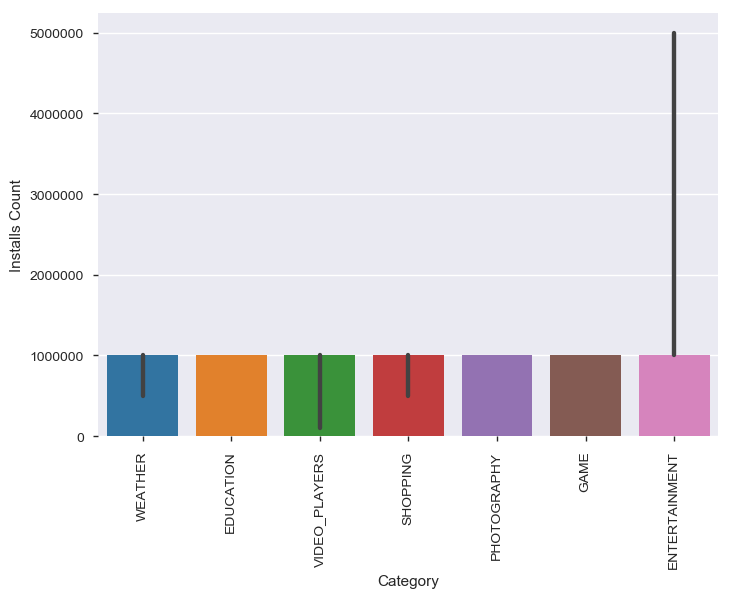

In [62]:
# Q1 1 - Bar plot with x=Category, y=median installs count. Plot only top cats by median
from numpy import median
top_5_downloaded_categories = playstore_data.groupby(playstore_data.Category)[['Installs Count']].median().sort_values('Installs Count', ascending=False).iloc[:7].index
sns.barplot(x='Category', y='Installs Count', data=playstore_data, estimator=median, order=top_5_downloaded_categories)
plt.xticks(rotation=90)
plt.show

From above, we can see that __Weather__, __Education__, __Video players__, __Shopping__, __Photography__, __Game__, __Entertainment__ are the most popular categories on Play store.

<function matplotlib.pyplot.show(*args, **kw)>

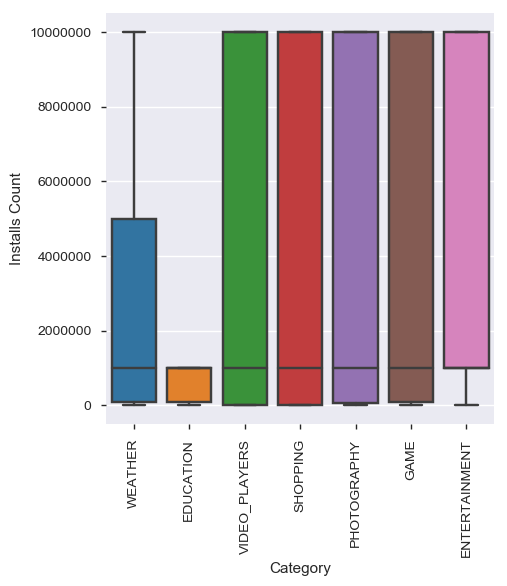

In [63]:
# Q1 2 - Box plot to see distribution of downloads. Plot only top 5 cats by median
sns.catplot(x='Category', y='Installs Count', data=playstore_data, estimator=median, order=top_5_downloaded_categories, kind='box', sym='')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show
# Video players and games have quite a few outliers

From above, we can see that, among top categories, __Entertainment__ has most downloads and __Education__ has less downloads.

<a id='section402'></a>
### 4.2 Is low OS support any deciding factor for download count?

<function matplotlib.pyplot.show(*args, **kw)>

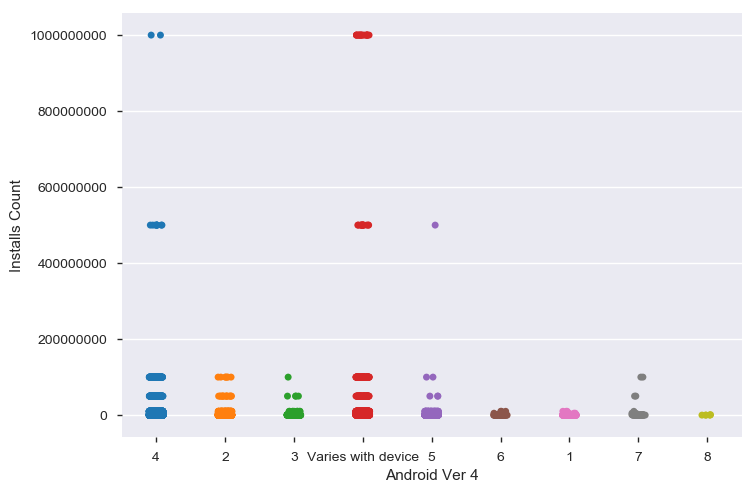

In [64]:
# Q2 Is low OS support any deciding factor for download count
# Strip plot OS vs installs count
sns.stripplot(x="Android Ver 4", y="Installs Count", data=playstore_data)
plt.ticklabel_format(style='plain', axis='y')
plt.show
# Support for 4 and above Android version gives more downloads.
# A lot of apps are providing app with multiple OS support as well and they have highest downloads.
# Low OS support doesn't guarantee more downloads. And most probably low OS support apps might be abandoned apps.

- Support for 4 and above Android version gives more downloads.
- A lot of apps are providing app with multiple OS support as well and they have highest downloads.
- Low OS support doesn't guarantee more downloads. And most probably low OS support apps might be abandoned apps.

<a id='section403'></a>
### 4.3 Do paid apps have comparable download count with free apps?

Check count of __free__ and __paid__ apps in the given data

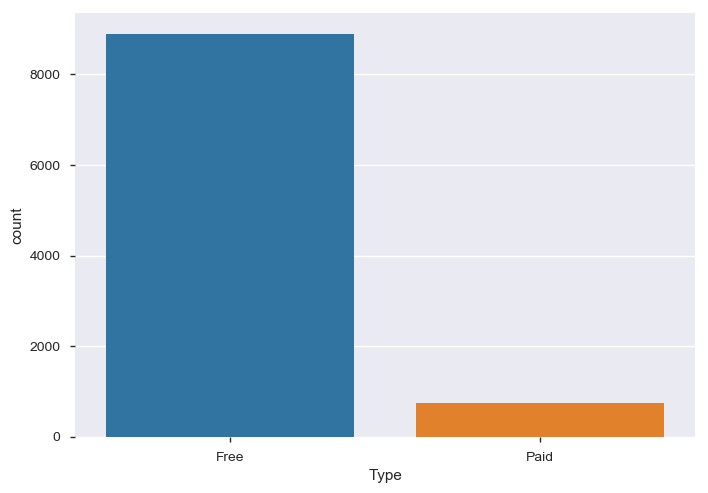

In [65]:
# Q3 1 Check count of free and paid apps in the given data
sns.countplot(x="Type", data=playstore_data)
# Less than 10% of the apps are paid in the given data and this is a likely trend in Google playstore also.

Less than __10%__ of the apps are __paid__ in the given data and this is a likely trend in Google playstore also.


Check __installs count__ of free and paid apps

<function matplotlib.pyplot.show(*args, **kw)>

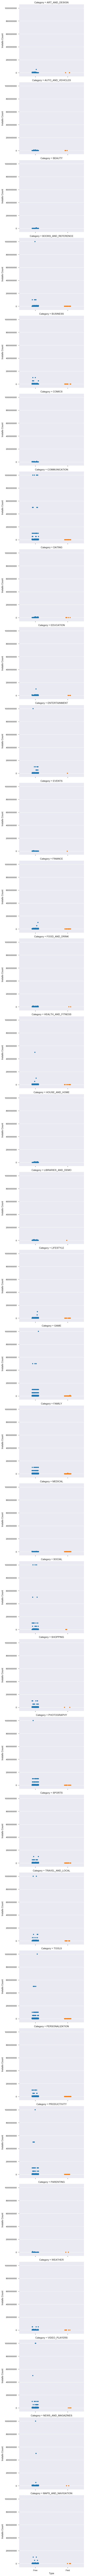

In [66]:
ax = sns.catplot(x="Type", y="Installs Count", data=playstore_data, row = 'Category', jitter=True)
plt.ticklabel_format(style='plain', axis='y')
plt.show

- Except __Social category__, in all categories free apps dominate the installs count.
- In Social category, paid apps have slight comparable installs count with free apps.

<a id='section404'></a>
### 4.4 Is app size influencing download count?

<function matplotlib.pyplot.show(*args, **kw)>

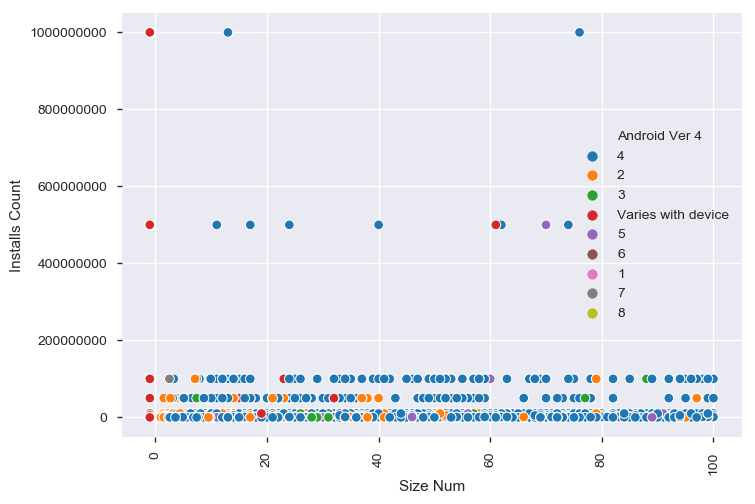

In [67]:
sns.scatterplot(x='Size Num', y='Installs Count', hue='Android Ver 4', data=playstore_data)
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show

At a high level, it seems that app count __doesn't matter much__.

Let us go deeper by analysing data of apps whose __size is less than 20MB__.

<function matplotlib.pyplot.show(*args, **kw)>

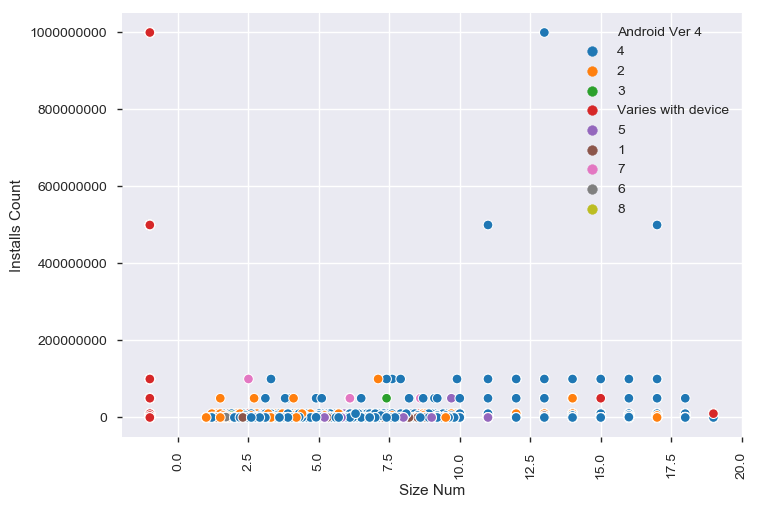

In [68]:
sns.scatterplot(x='Size Num', y='Installs Count', hue='Android Ver 4', data=playstore_data[playstore_data['Size Num'] < 20])
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show

- Though density reduces a lot as size increases, there are __more downloads for apps with higher size__.
- __App quality__ might increase app size.
- This proves that __people don't mind to install apps with higher size, if the app quality is good__.

Let us check the distribution of installs count with size.

<function matplotlib.pyplot.show(*args, **kw)>

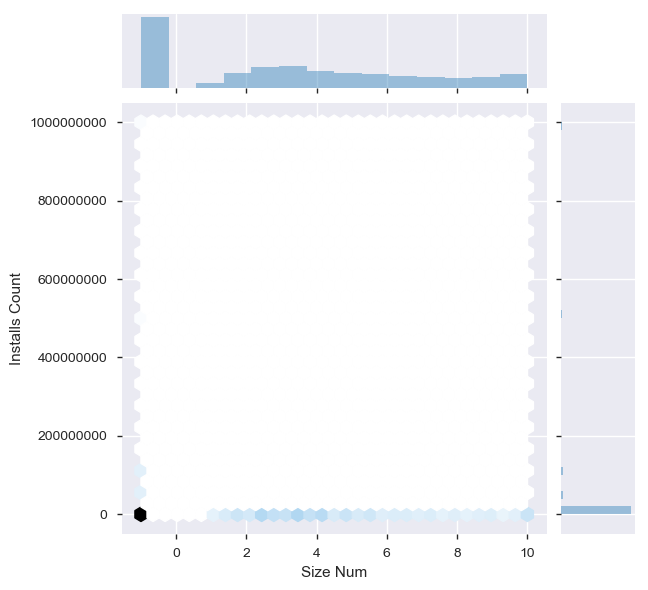

In [69]:
sns.jointplot(x='Size Num', y='Installs Count', kind="hex", data=playstore_data[playstore_data['Size Num'] <= 10]);
plt.ticklabel_format(style='plain', axis='y')
plt.show

There are a lot of apps with less app size and decent installs count. But these apps are not the highest download apps.

<a id='section405'></a>
### 4.5 How content rating affects download count?

<function matplotlib.pyplot.show(*args, **kw)>

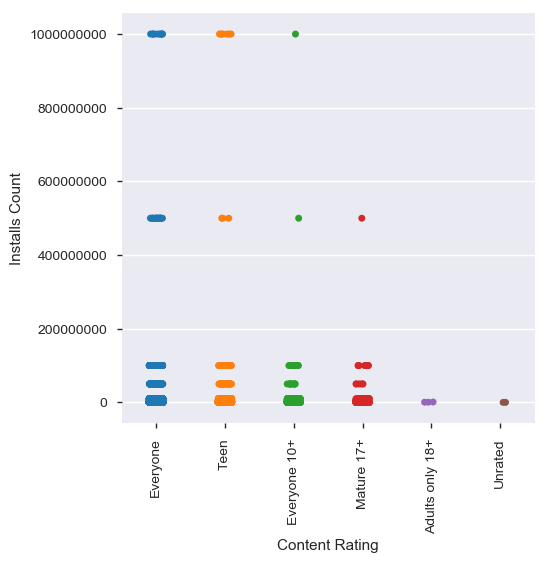

In [70]:
# Q5 
ax = sns.catplot(x="Content Rating", y="Installs Count", data=playstore_data, jitter=True)
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show

- Clearly __family safe apps have most number of downloads__.
- Interestingly, Teen apps have more downloads compared to 'Everyone 10+' apps.
- To have more record number of downloads, app content has to be family safe.

<a id='section406'></a>
### 4.6 How size is distributed among top 7 categories?

<function matplotlib.pyplot.show(*args, **kw)>

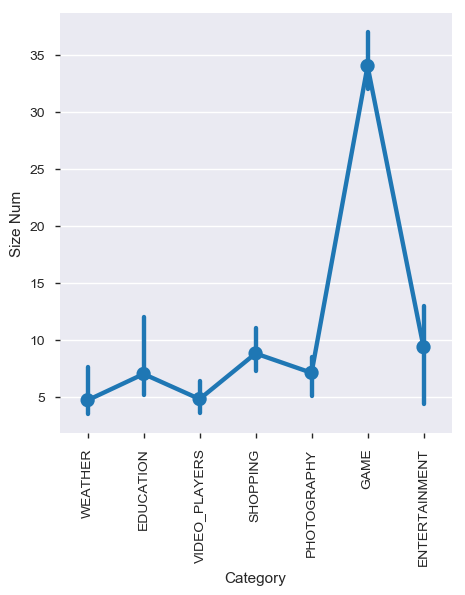

In [71]:
sns.catplot(x='Category', y='Size Num', data=playstore_data, estimator=median, order=top_5_downloaded_categories, kind='point')
plt.xticks(rotation=90)
plt.show

__Games have highest size__ among top categories followed by entertainment and shopping

<a id='section407'></a>
### 4.7 How Content Rating is distributed among top 7 categories?

<function matplotlib.pyplot.show(*args, **kw)>

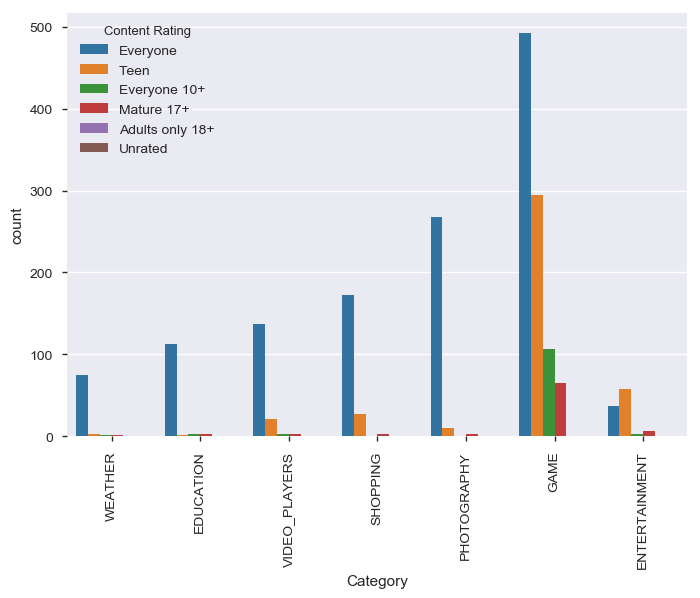

In [72]:
sns.countplot(x='Category', data=playstore_data, order = top_5_downloaded_categories, hue='Content Rating')
plt.xticks(rotation=90)
plt.show

All top categories have most number of family safe apps except entertainment.

<a id='section408'></a>
### 4.8 Do apps with high review count have high download count?

<function matplotlib.pyplot.show(*args, **kw)>

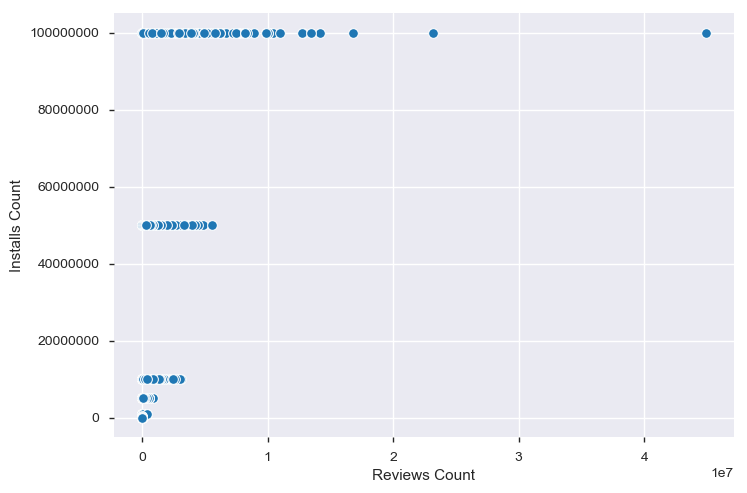

In [73]:
sns.scatterplot(x='Reviews Count', y='Installs Count', data=playstore_data[playstore_data['Installs Count'] < 200000000]);
plt.ticklabel_format(style='plain', axis='y')
plt.show

- Apps with high reviews count have high download count.
- But it can be seen as download count influencing review count primarily.

<a id='section409'></a>
### 4.9 Do recently downloaded apps have high download count?

<function matplotlib.pyplot.show(*args, **kw)>

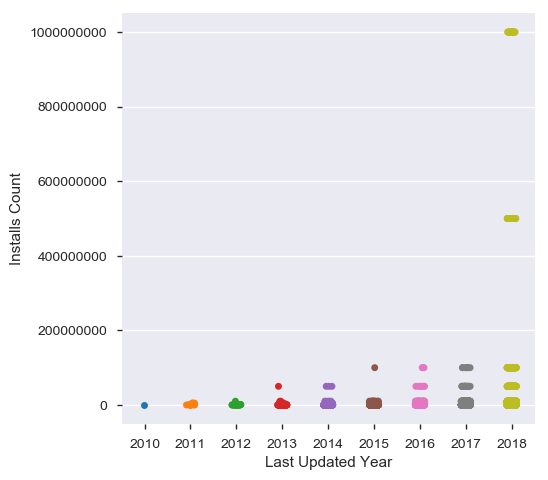

In [74]:
sns.catplot(x = 'Last Updated Year', y = 'Installs Count', data=playstore_data)
plt.ticklabel_format(style='plain', axis='y')
plt.show

- It clearly shows that people tend use recently updated apps and uninstall outdated apps.
- As last updated year gets older, the install count is decreasing

<a id='section410'></a>
### 4.10 Does download count increase with app maturity?

<function matplotlib.pyplot.show(*args, **kw)>

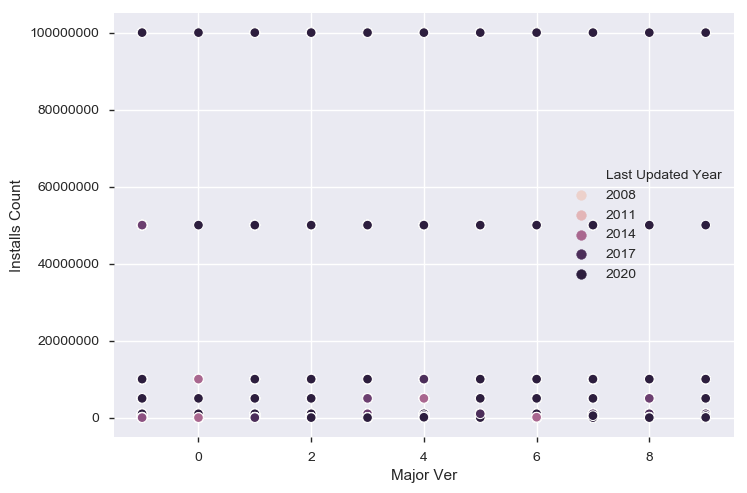

In [75]:
sns.scatterplot(x = 'Major Ver', y = 'Installs Count', data=playstore_data[playstore_data['Installs Count']<200000000], hue = 'Last Updated Year')
plt.ticklabel_format(style='plain', axis='y')
plt.show

- This is not necessarily true. Also major version may not exactly imply app maturity.
- Apps with recent updates even though not so mature have high downloads.

<a id='conclusions'></a>
## 5. Conclusions

- Family safe apps have most number of downloads.
- Free apps have most number of downloads compared to paid apps.
- Most downloaded apps are from only 7 categories.
- Apps have to be frequently updated, to be recommended on Google play store and to get more number of downloads.
- Users don't mind to install apps with big size, when the content has quality.